In [9]:
import tensorflow as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

sns.set()

In [10]:
df = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.rename(columns={'0':'label'}, inplace=True)
X = df.drop('label', axis = 1)
y = df['label']

print(X.shape)
X.head()

(372450, 784)


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


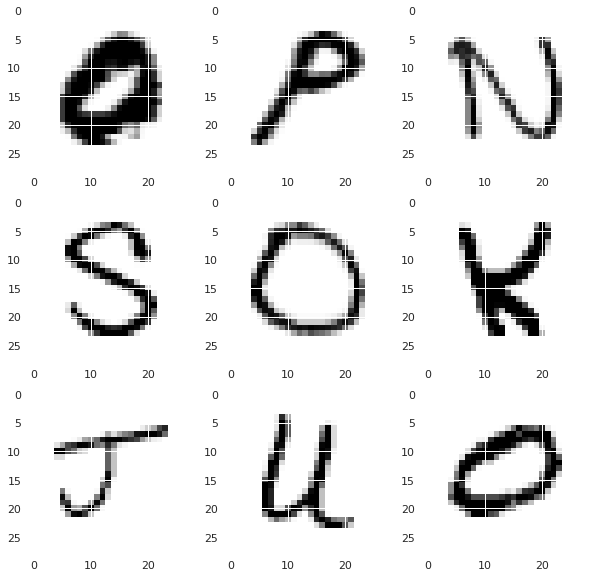

In [12]:
from sklearn.utils import shuffle
X_Shuffled = shuffle(X)

plt.figure(figsize = (10, 10))
rows, columns = 3, 3

for i in range(9):
    plt.subplot(columns, rows, i+1)
    plt.imshow(X_Shuffled.iloc[i].values.reshape(28,28), interpolation='nearest', cmap='Greys')
    
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

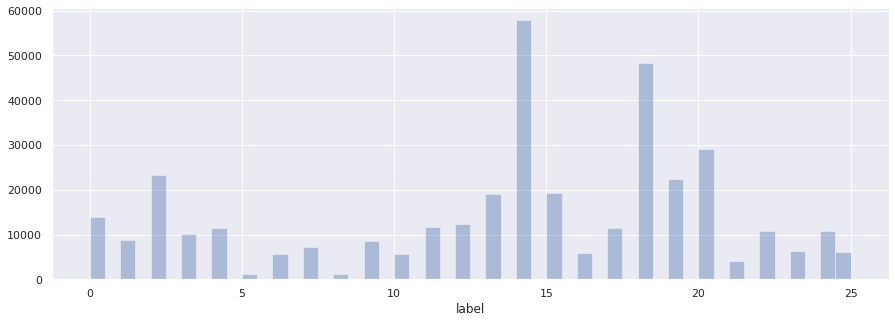

In [13]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

plt.figure(figsize=(15,5))
sns.distplot(y,kde=False)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((297960, 784), (74490, 784), (297960,), (74490,))

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

name_tag

,0
0,a
1,b
2,c
3,d
4,e
5,f
6,g
7,h
8,i
9,j


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

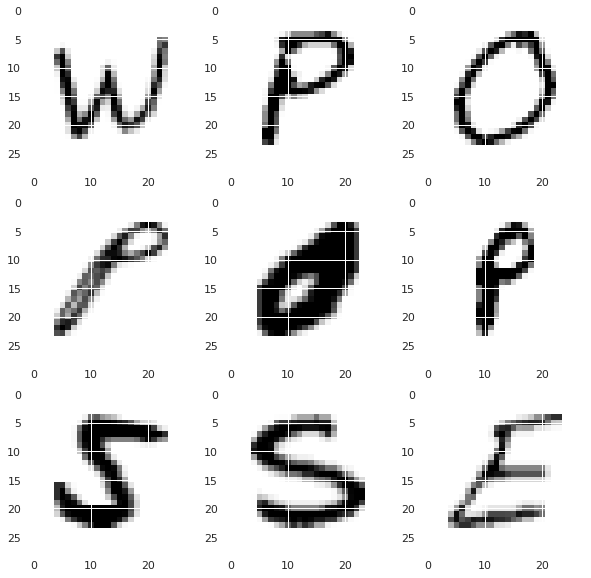

In [18]:
X_Shuffled = shuffle(X)

plt.figure(figsize = (10, 10))
rows, columns = 3, 3

for i in range(9):
    plt.subplot(columns, rows, i+1)
    plt.imshow(X_Shuffled.iloc[i].values.reshape(28,28), interpolation='nearest', cmap='Greys')
    
plt.show()

In [19]:
from keras.utils import np_utils
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [37]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16, batch_size=200, verbose=2)

Epoch 1/16
1304/1304 - 41s - loss: 0.2387 - accuracy: 0.9337 - val_loss: 0.0998 - val_accuracy: 0.9724
Epoch 2/16
1304/1304 - 38s - loss: 0.0902 - accuracy: 0.9747 - val_loss: 0.0714 - val_accuracy: 0.9815
Epoch 3/16
1304/1304 - 38s - loss: 0.0689 - accuracy: 0.9806 - val_loss: 0.0660 - val_accuracy: 0.9818
Epoch 4/16
1304/1304 - 38s - loss: 0.0562 - accuracy: 0.9839 - val_loss: 0.0518 - val_accuracy: 0.9867
Epoch 5/16
1304/1304 - 37s - loss: 0.0471 - accuracy: 0.9862 - val_loss: 0.0510 - val_accuracy: 0.9873
Epoch 6/16
1304/1304 - 38s - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0480 - val_accuracy: 0.9881
Epoch 7/16
1304/1304 - 37s - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0454 - val_accuracy: 0.9894
Epoch 8/16
1304/1304 - 36s - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0523 - val_accuracy: 0.9872
Epoch 9/16
1304/1304 - 37s - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0458 - val_accuracy: 0.9899
Epoch 10/16
1304/1304 - 37s - loss: 0.0227 - accuracy: 0.9927 - val_loss:

In [50]:
model.save("htr.h5")
import pickle

Pkl_Filename = "htr.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

TypeError: can't pickle weakref objects

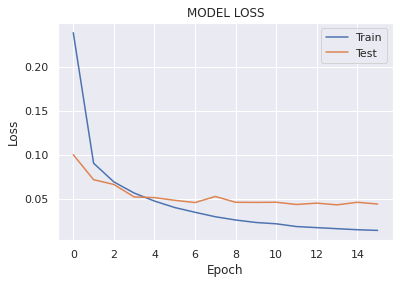

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

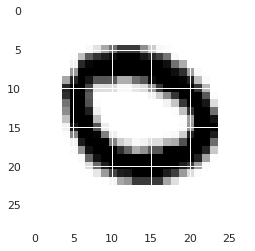

In [22]:
plt.imshow(X_test[[18]].reshape(28,28),cmap='Greys')

In [23]:
prediction = model.predict(X_test[[18]]) 
print(prediction)
score = np.argmax(prediction)
score = prediction[0,score]
score = round((score*100), 4)

score

[[3.7038845e-08 3.7601210e-06 3.3219080e-04 6.5884749e-05 8.2148880e-08
  8.5059804e-10 2.7762080e-05 5.3593779e-10 3.7159618e-09 5.6855515e-06
  4.9240112e-10 1.4453299e-13 3.7068929e-13 8.5871861e-08 9.9644047e-01
  5.3442654e-06 7.2944362e-04 3.5494202e-10 2.3886978e-03 2.2355873e-10
  5.2750693e-07 1.9252679e-10 1.0246248e-09 7.6950280e-14 9.0854027e-09
  6.5051892e-10]]


99.644

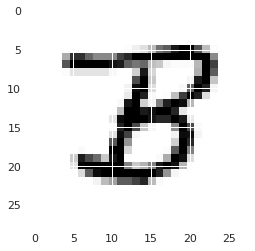

In [24]:
plt.imshow(X_test[[19]].reshape(28,28),cmap='Greys')

In [25]:
prediction = model.predict(X_test[[19]]) 
print(prediction)
score = np.argmax(prediction)
score = prediction[0,score]
score = round((score*100), 4)

score

[[7.65734753e-10 9.99717295e-01 4.55458782e-09 6.43090607e-05
  2.23571348e-07 8.09941114e-10 7.96594861e-07 4.64522648e-12
  1.79046523e-07 1.06675243e-05 2.47401665e-12 1.41231705e-11
  1.34532663e-10 8.07694536e-11 2.36001529e-09 2.65221473e-07
  2.96579050e-09 1.19234585e-06 1.20687389e-06 1.55836783e-08
  1.97765306e-08 2.28766131e-10 8.82287077e-10 4.81816778e-06
  1.10160965e-08 1.99007583e-04]]


99.9717

In [26]:
result(prediction)

Prediction:  b Score:  99.9717


In [27]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [28]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [29]:
import imutils
import cv2
import numpy as np
def final(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.show()
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    for c in cnts:

        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (28, 28), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,28,28,1)
        ypred = model.predict(thresh)

        result(ypred)

    plt.imshow(image)


In [30]:
def result(pred):
    alphabets="abcdefghijklmnopqrstuvwxyz"
    list1=[]
    [list1.append(i) for i in range(26)]
    list2=[]
    [list2.append(i) for i in alphabets]
    dic = dict(zip(list1, list2))
    score = np.argmax(pred)
    score = pred[0,score]
    score = round((score*100), 4)

    print("Prediction: ",dic[np.argmax(pred)], "Score: ", score)


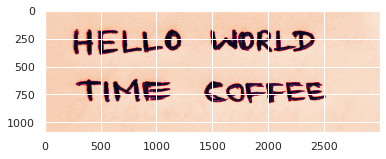

Prediction:  h Score:  66.4609
Prediction:  t Score:  99.9999
Prediction:  u Score:  39.6882
Prediction:  e Score:  100.0
Prediction:  c Score:  95.6746
Prediction:  v Score:  99.9991
Prediction:  l Score:  100.0
Prediction:  n Score:  75.6846
Prediction:  e Score:  99.9999
Prediction:  l Score:  100.0
Prediction:  d Score:  74.2167
Prediction:  o Score:  89.648
Prediction:  c Score:  99.9617
Prediction:  g Score:  74.9787
Prediction:  j Score:  70.9617
Prediction:  d Score:  99.7792
Prediction:  f Score:  100.0
Prediction:  r Score:  99.9999
Prediction:  f Score:  100.0
Prediction:  l Score:  99.9559
Prediction:  e Score:  100.0
Prediction:  i Score:  99.9988
Prediction:  j Score:  99.9928
Prediction:  e Score:  100.0
Prediction:  p Score:  48.623


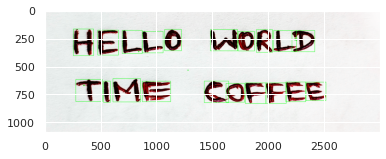

In [39]:
final('../input/dummys/IMG_20220317_144817__01__01__01.jpg')

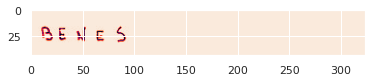

Prediction:  b Score:  100.0
Prediction:  e Score:  100.0
Prediction:  n Score:  75.2462
Prediction:  e Score:  100.0
Prediction:  s Score:  100.0


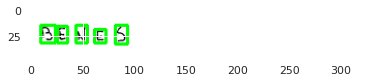

In [40]:
final('../input/dummys/TRAIN_00003.jpg')

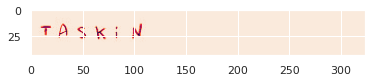

Prediction:  t Score:  100.0
Prediction:  n Score:  45.6108
Prediction:  s Score:  100.0
Prediction:  k Score:  100.0
Prediction:  s Score:  62.043
Prediction:  n Score:  99.9859


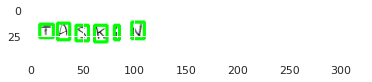

In [41]:
final('../input/dummys/TEST_0094.jpg')

In [ ]:
scores = {
    
}